In [8]:
#coding:utf-8
__author__ = 'jacky(fork by Hanxiaoayang)'

import warnings
warnings.filterwarnings("ignore")
import jieba    #分词包
import numpy    #numpy计算包
import codecs   #codecs提供的open方法来指定打开的文件的语言编码，它会在读取的时候自动转换为内部unicode 
import pandas as pd  
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)
from wordcloud import WordCloud#词云包

In [3]:
df = pd.read_csv("./data/entertainment_news.csv", encoding='utf-8')
df = df.dropna()
content = df.content.values.tolist()
#jieba.load_userdict(u"data/user_dic.txt")
segment = []
for line in content:
    try:
        segs = jieba.lcut(line)
        for seg in segs:
            if len(seg) > 1 and seg != '\r\n':
                segment.append(seg)
    except:
        print(line)
        continue

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.660 seconds.
Prefix dict has been built succesfully.


In [4]:
df.head()

,Unnamed: 0,content
0,0,2016年是综艺井喷的一年，《2016年中国网络视听发展研究报告》数据显示，截至2016...
1,1,区别
2,2,平台决定了资源的多寡和资本的投入
3,3,网络综艺和电视综艺最大的区别在哪？其实是平台。因为平台决定了资源的多寡和资本的投入。所以...
4,4,网络综艺与电视综艺在播出模式、观众群体以及节目板块等方面也都存在差异。在传播上，电视台比...


In [5]:
segment[:5]

['2016', '综艺', '井喷', '一年', '2016']

In [6]:
#去停用词
words_df = pd.DataFrame({'segment':segment})
#words_df.head()
stopwords = pd.read_csv("data/stopwords.txt",index_col = False,quoting = 3,sep = "\t",names = ['stopword'], encoding = 'utf-8')#quoting=3全不引用
#stopwords.head()
words_df = words_df[~words_df.segment.isin(stopwords.stopword)]

In [11]:
#统计词频
words_stat = words_df.groupby(by = ['segment'])['segment'].agg({"计数":numpy.size})
words_stat = words_stat.reset_index().sort_values(by = ["计数"],ascending = False)
words_stat.head()

,segment,计数
60811,电影,10230
73265,观众,5574
8615,中国,5476
70481,节目,4398
33623,导演,4197


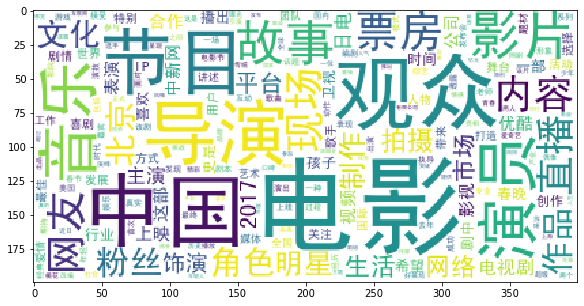

In [15]:
#词云
wordcloud = WordCloud(font_path = "data/simhei.ttf",background_color = "white",max_font_size = 80)
word_frequence = {x[0]:x[1] for x in words_stat.head(1000).values}
wordcloud = wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud)

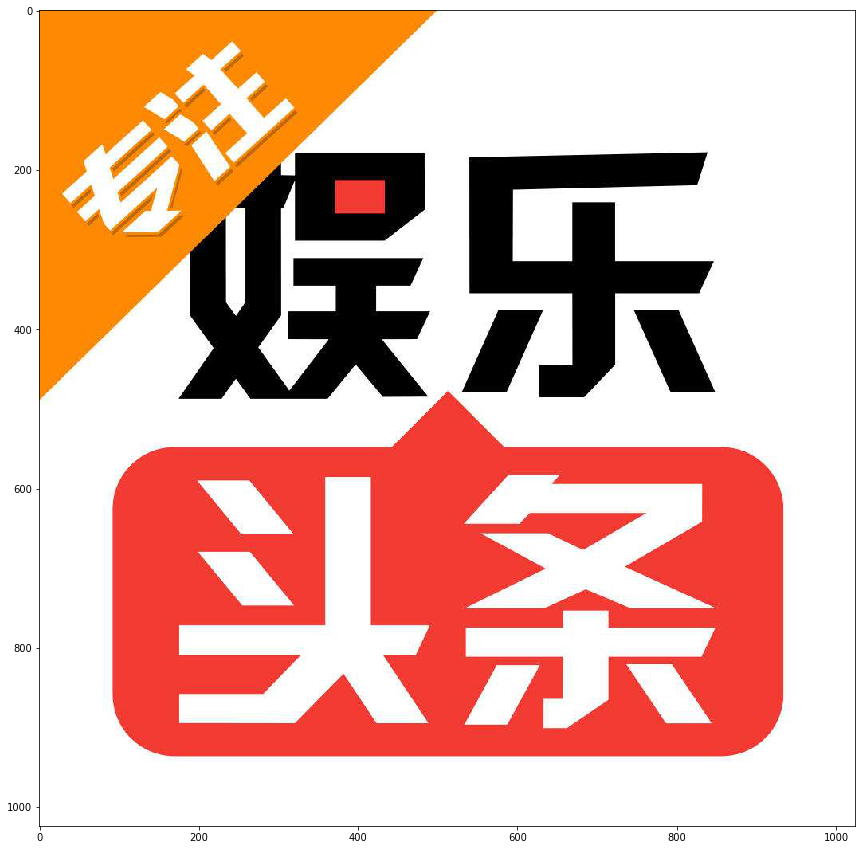

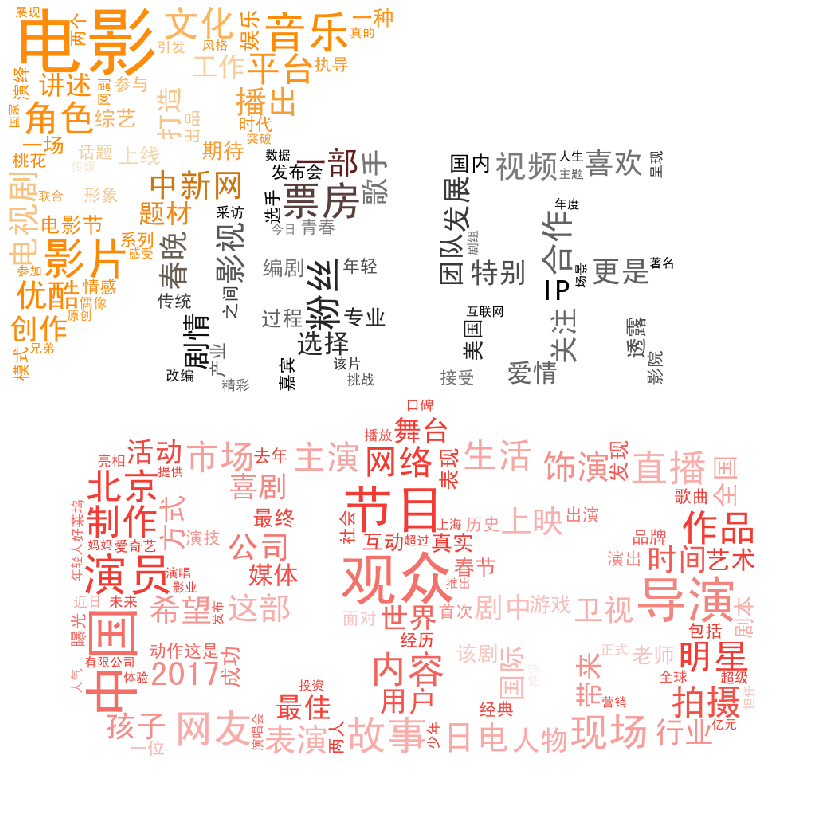

In [24]:
# 自定义背景图做词云
# from scipy.misc import imread
from matplotlib.pyplot import imread
matplotlib.rcParams['figure.figsize'] = (15.0, 15.0)
from wordcloud import WordCloud,ImageColorGenerator
bimg=imread('image/entertainment.jpeg')
plt.imshow(bimg)
plt.show()
wordcloud=WordCloud(background_color="white",mask=bimg,font_path='data/simhei.ttf',max_font_size=200)
word_frequence = {x[0]:x[1] for x in words_stat.head(1000).values}
wordcloud=wordcloud.fit_words(word_frequence)
bimgColors=ImageColorGenerator(bimg)
plt.axis("off")
plt.imshow(wordcloud.recolor(color_func=bimgColors))
plt.show()

In [13]:
#体育新闻
df = pd.read_csv("./data/sports_news.csv", encoding='utf-8')
df = df.dropna()
content=df.content.values.tolist()
#jieba.load_userdict(u"data/user_dic.txt")
segment=[]
for line in content:
    try:
        segs=jieba.lcut(line)
        for seg in segs:
            if len(seg)>1 and seg!='\r\n':
                segment.append(seg)
    except:
        print(line)
        continue
  

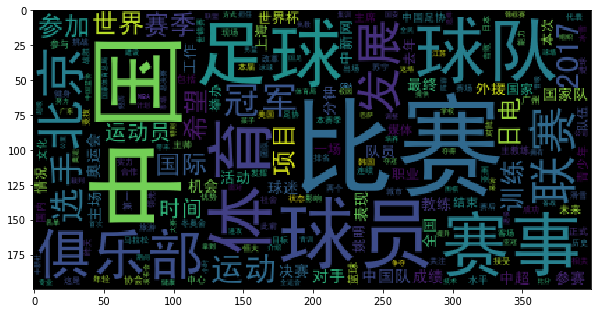

In [25]:
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
words_df=pd.DataFrame({'segment':segment})
#words_df.head()
stopwords=pd.read_csv("data/stopwords.txt",index_col=False,quoting=3,sep="\t",names=['stopword'], encoding='utf-8')#quoting=3全不引用
#stopwords.head()
words_df=words_df[~words_df.segment.isin(stopwords.stopword)]
words_stat=words_df.groupby(by=['segment'])['segment'].agg({"计数":numpy.size})
words_stat=words_stat.reset_index().sort_values(by=["计数"],ascending=False)
words_stat.head()
wordcloud=WordCloud(font_path="data/simhei.ttf",background_color="black",max_font_size=80)
word_frequence = {x[0]:x[1] for x in words_stat.head(1000).values}
wordcloud=wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud)